# Desafio #QuarentenaDados

Bem-vinda e bem-vindo ao desafio #QuarentenaDados valendo um **Nintendo Switch**!

Esse notebook traz informações dos dados e como você deve configurar seu arquivo final para submissão.

**Caso queira usar esse notebook como exemplo para desenvolver seu projeto, clique em file e escolha a opção Save a copy in Drive**


Vamos trabalhar com uma amostra aleatória da base de dados MICRODADOS ENEM 2018, essa amostra é **diferente da apresentada em aula**. Junto com a divulgação do resultado final estaremos disponibilizando o código que gerou os dados para que você possa analisar e reproduzir os datasets. 

Seu objetivo é prever da melhor forma possível a nota das provas de **linguagens e códigos** (NU_NOTA_LC), dado todas as outras notas. O modelo que tiver o menor **erro quadrático médio (MSE)** vence o desafio.

Para o desafio você tem três bases à disposição, duas para desenvolver seu modelo e uma para submissão da predição. As bases são as seguintes:

- **dados_treino**: São 1500000 linhas contendo a nota das 4 provas + nota de redação.

- **dados_teste**: São 20000 linhas contendo com notas das 4 provas + nota de redação.

- **dados_desafioqt**: São 10000 linhas com nota de 3 provas + nota de redação. A nota da prova de **Linguagem e Codigos** (NU_NOTA_LC) não está disponível nessa base.


As base **dados_treino e dados_teste**, contém as seguintes colunas; **NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO, NU_NOTA_LC** (Você pode consultar a aula 5, onde o Guilherme explica o significado das siglas). A coluna que você deve realizar a **previsão** é **NU_NOTA_LC**. Você pode manipular os dados da forma que quiser, o importante é que no final submeta o arquivo com as informações corretas (detalhes da submissão serão discutidos no final deste notebook).

A base **dados_desafioqt**, contém as seguintes colunas; **ID, NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO**. Repare que os dados **NU_NOTA_LC** não estão presentes, essa é justamente a informação que você precisa prever. Nós temos os valores reais das notas, no final do prazo de submissão um script irá avaliar sua previsão e dará uma nota para o seu modelo. Nessa base também temos o **ID**, essa informação é importante para o envio da sua previsão, garanta que a nota prevista corresponda ao respectivo **ID**.

Se você está habituado com o desenvolvimento de modelos de ML, repare que essa divisão de dados é exatamente a mesma que Treino, Teste e Validação. 

Abaixo preparamos um código exemplo para você seguir, sinta-se à vontade para experimentar diversos outros métodos, mas **GARANTA QUE O ARQUIVO DE SUBMISSÃO ESTEJA CONFIGURADO CORRETAMENTE**.

Na primeira parte, estamos lendo a base de dados direto de arquivos no github.






In [0]:
import pandas as pd
import numpy as np

URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

In [0]:
# dados_treino.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
# dados_teste.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
# dados_desafioqt.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

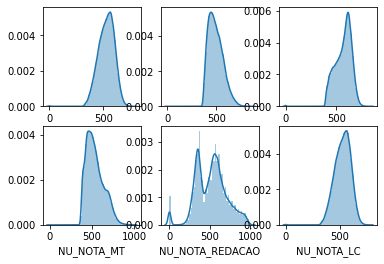

In [0]:
disc = ['CN', 'CH', 'MT', 'REDACAO', 'LC']
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.distplot(pd.concat([dados_treino,dados_teste])[f'NU_NOTA_{disc[i-2]}'])

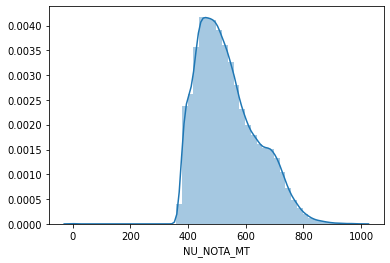

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

x = pd.concat([dados_treino,dados_teste])['NU_NOTA_MT']
sns.distplot(x);

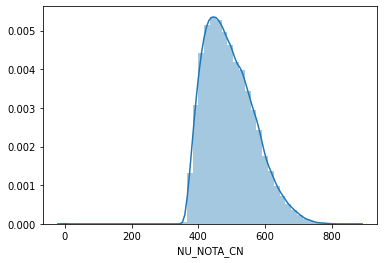

In [0]:
x = pd.concat([dados_treino,dados_teste])['NU_NOTA_CN']
sns.distplot(x);

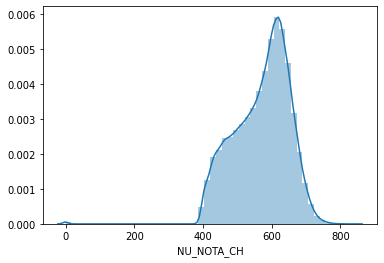

In [0]:
x = pd.concat([dados_treino,dados_teste])['NU_NOTA_CH']
sns.distplot(x);

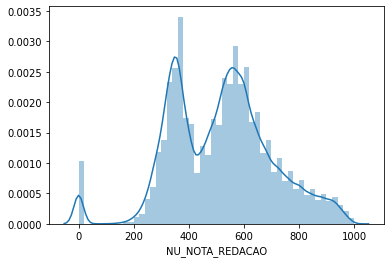

In [0]:
x = pd.concat([dados_treino,dados_teste])['NU_NOTA_REDACAO']
sns.distplot(x);

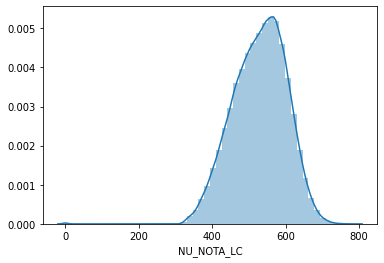

In [0]:
x = pd.concat([dados_treino,dados_teste])['NU_NOTA_LC']
sns.distplot(x);

In [0]:
dados_treino.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.568969,0.594625,0.580603,0.513613
NU_NOTA_CH,0.568969,1.000000,0.701125,0.531336,0.508316
NU_NOTA_LC,0.594625,0.701125,1.000000,0.567226,0.560623
NU_NOTA_MT,0.580603,0.531336,0.567226,1.000000,0.489896
NU_NOTA_REDACAO,0.513613,0.508316,0.560623,0.489896,1.000000


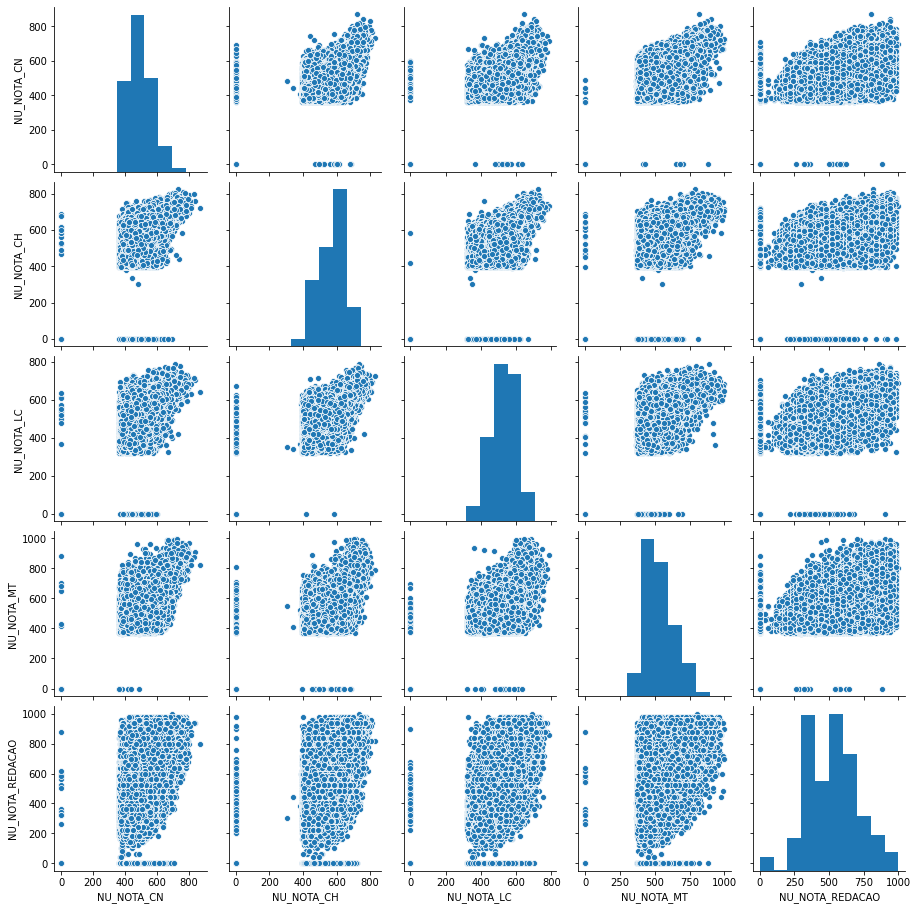

In [0]:
sns.pairplot(dados_treino)

Agora com as bases de dados lidas, vamos separar as informações de cada dataset. X_treino e Y_treino são as **features**, X_teste e Y_teste são as **labels** a serem previstas.

Duas observações nesta parte:

- 1° Como já disponibilizamos os dados de treino e teste separados, você não precisa fazer *train_test_split* feito em aula (porém fique à vontade para trabalhar da forma que achar melhor).

- 2° Transformamos X_treino, Y_treino, X_teste, Y_teste em arrays numpy. Se você quiser usar uma biblioteca que não aceite dataframe como entrada de dados, já deixamos pronto para você.

In [0]:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

X_treino = dados_treino[coluna_features].to_numpy()
Y_treino = dados_treino[coluna_label].to_numpy()
X_teste = dados_teste[coluna_features].to_numpy()
Y_teste = dados_teste[coluna_label].to_numpy()


A seguir criamos um modelo **Dummy** como exemplo e realizamos a avaliação do modelo com o **mean_squared_error**. 

Você pode usar qualquer algoritmo ou biblioteca para criar seus modelos, mas garanta que fará a avaliação com o mean_squared_error, pois usaremos essa métrica para avaliar sua predição final.

In [0]:
#Dummy
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

modelo_dummy = DummyRegressor()
modelo_dummy.fit(X_treino, Y_treino)
dummy_predicoes = modelo_dummy.predict(X_teste)

avaliacao_dummy = mean_squared_error(Y_teste, dummy_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_dummy}")

Minha avaliação nos dados de teste foi de 5219.286870186777


In [0]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo_LR = LinearRegression()
modelo_LR.fit(X_treino, Y_treino)
LR_predicoes = modelo_LR.predict(X_teste)

avaliacao_LR = mean_squared_error(Y_teste, LR_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_LR}")

Minha avaliação nos dados de teste foi de 2177.3839304103562


In [0]:
#RANSACRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error

modelo_RANSAC = RANSACRegressor(random_state=8)
modelo_RANSAC.fit(X_treino, Y_treino)
RANSAC_predicoes = modelo_RANSAC.predict(X_teste)

avaliacao_RANSAC = mean_squared_error(Y_teste, RANSAC_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_RANSAC}")

Minha avaliação nos dados de teste foi de 2301.48922922216


In [0]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

modelo_DTR = DecisionTreeRegressor()
modelo_DTR.fit(X_treino, Y_treino)
DTR_predicoes = modelo_DTR.predict(X_teste)

avaliacao_DTR = mean_squared_error(Y_teste, DTR_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_DTR}")

Minha avaliação nos dados de teste foi de 4230.3038255


In [0]:
#LinearSVR
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

modelo_LinearSVR = LinearSVR()
modelo_LinearSVR.fit(X_treino, Y_treino)
LinearSVR_predicoes = modelo_LinearSVR.predict(X_teste)

avaliacao_LinearSVR = mean_squared_error(Y_teste, LinearSVR_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_LinearSVR}")

Minha avaliação nos dados de teste foi de 7507.250033232185


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
#SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

modelo_SGDR = SGDRegressor()
modelo_SGDR.fit(X_treino, Y_treino)
SGDR_predicoes = modelo_SGDR.predict(X_teste)

avaliacao_SGDR = mean_squared_error(Y_teste, SGDR_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_SGDR}")

Minha avaliação nos dados de teste foi de 1.499405098464392e+28


In [0]:
#Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

modelo_Lasso = Lasso()
modelo_Lasso.fit(X_treino, Y_treino)
Lasso_predicoes = modelo_Lasso.predict(X_teste)

avaliacao_Lasso = mean_squared_error(Y_teste, Lasso_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_Lasso}")

Minha avaliação nos dados de teste foi de 2177.3909486336106


In [0]:
#ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

modelo_ElasticNet = ElasticNet()
modelo_ElasticNet.fit(X_treino, Y_treino)
ElasticNet_predicoes = modelo_ElasticNet.predict(X_teste)

avaliacao_ElasticNet = mean_squared_error(Y_teste, ElasticNet_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_ElasticNet}")

Minha avaliação nos dados de teste foi de 2177.3889221018035


In [0]:
#BayesianRidge
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error

modelo_BayesianRidge = BayesianRidge()
modelo_BayesianRidge.fit(X_treino, Y_treino)
BayesianRidge_predicoes = modelo_BayesianRidge.predict(X_teste)

avaliacao_BayesianRidge = mean_squared_error(Y_teste, BayesianRidge_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_BayesianRidge}")

Minha avaliação nos dados de teste foi de 2177.3848723376304


In [0]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

modelo = KNeighborsRegressor(n_neighbors=129,algorithm='auto')
modelo.fit(X_treino, Y_treino)
modelo_predicoes = modelo.predict(X_teste)

avaliacao_modelo = mean_squared_error(Y_teste, modelo_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_modelo}")

Minha avaliação nos dados de teste foi de 2063.416901900998


In [0]:
#MLPRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

modelo = MLPRegressor(random_state=4)
modelo.fit(X_treino, Y_treino)
modelo_predicoes = modelo.predict(X_teste)

avaliacao_modelo = mean_squared_error(Y_teste, modelo_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_modelo}")

Minha avaliação nos dados de teste foi de 2089.519250424388


Depois que você criou testou e validou seu modelo, chegou a hora de preparar seu arquivo para a submissão do resultado.

No código abaixo, estamos realizando a predição das notas de **linguagem e códigos** do dataset **dados_desafioqt**. Feita a previsão, criamos um dataframe novo para a submissão, primeiro crimos a coluna **ID** e adicionamos a coluna **NU_NOTA_LC** com suas respectivas previsões (repare que nosso modelo não alterou as ordens dos ID's, mas se você utilizar algum modelo que embaralhe essa ordem certifique de colocar a previsão correta para o ID correto).

Após isso, salvamos o dataframe com ´.to_csv()´ (**importante, passe o parâmetro index=False para `.to_csv()`, caso contrário nosso script não computará sua nota**) no arquivo **PREDICAO_DESAFIOQT.csv (você precisa submeter o arquivo com esse nome, caso contrário nosso script de avaliação não computará sua nota**)  e utilizamos o `files.download` para baixar o arquivo em sua máquina local.

Feito tudo isso você está quase pronto para finalizar e submeter seu resultado. Você já baixou os dados, treinou e validou seu modelo, salvou sua previsão **no padrão ideal para submissão** e já está com o modelo baixado em sua máquina. Entretanto, ainda falta um detalhe: no momento de preencher o **forms** você precisa enviar seu código. Caso esteja usando os notebooks do colab siga as seguintes instruções para o download:

- Clique em **File** na parte superior esquerda.
- Depois selecione a opção **Download .ipynb** (também aceitaremos o .py caso você prefira desenvolver seu projeto em um arquivo python).


Pronto agora é só submeter seu resultado e torcer para levar um **Nintendo Switch** para casa.

Boa sorte!

In [0]:
#atribuir ao MODELO o nome do seu melhor modelo
from google.colab import files

MODELO = modelo_dummy
X_desafioqt = dados_desafioqt[coluna_features].to_numpy()
predicao_desafioqt = MODELO.predict(X_desafioqt)


desafio_df = pd.DataFrame(dados_desafioqt.ID)
desafio_df[coluna_label] = predicao_desafioqt

#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
files.download('PREDICAO_DESAFIOQT.csv')



MessageError: ignored